In [1]:
from region import Area
from pathlib import Path

/Users/augustfemtehjell/opt/miniconda3/envs/FYS5429/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
constraint_file = Path("advection_constraints.txt")
regions: list[Area] = []
with open(constraint_file, "r") as infile:

    N = int(infile.readline())
    for i in range(N):
        m = int(infile.readline())
        curr_region = Area()
        for j in range(m):
            x_C, t_C, const = map(float, infile.readline().split())
            curr_region.add_ineq(x_C, t_C, const)
        regions.append(curr_region)

ValueError: invalid literal for int() with base 10: '-1 1\n'

In [ ]:
for region in regions:
    print(region.constraints)

[(-1.0, 0.5, 0.2), (1.0, -0.5, 0.2)]
[(-1.0, 0.5, -0.2)]
[(1.0, -0.5, -0.2)]


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [4]:
x_vals = np.random.uniform(-1, 1, (2000, 1))
t_vals = np.random.uniform(0, 1, (2000, 1))
X = np.hstack([x_vals, t_vals])

In [5]:
for x, t in X:
    for region in regions:
        if not region.is_in_area(x, t):
            continue
        region.points.append([x, t])
        break

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


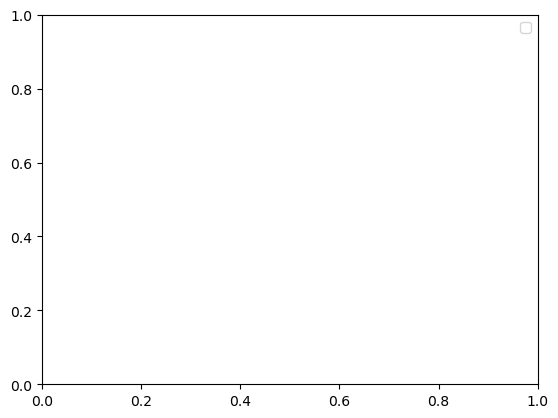

In [6]:
for i, region in enumerate(regions):
    region.points_to_df()
    plt.scatter(
        region.df_points["x"], region.df_points["t"], s=2.5, label=f"Region {i+1}"
    )
plt.legend()

In [1]:
from region import Region

total_region = Region("advection_constraints.txt")
total_region.test_points()
total_region.test_boundary_points()

/Users/augustfemtehjell/opt/miniconda3/envs/FYS5429/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


array([[-5.46785381e-01,  0.00000000e+00],
       [-1.57650121e-01,  0.00000000e+00],
       [-1.00000000e+00,  4.96502248e-01],
       [-9.15606333e-02,  0.00000000e+00],
       [-6.81515277e-02,  0.00000000e+00],
       [-1.00000000e+00,  1.06578609e-01],
       [ 3.98377638e-01,  0.00000000e+00],
       [ 4.64216198e-02,  0.00000000e+00],
       [-1.16123142e-01,  0.00000000e+00],
       [ 1.24497935e-01,  0.00000000e+00],
       [-1.00000000e+00,  4.91626686e-01],
       [-4.56680003e-01,  0.00000000e+00],
       [ 2.39058402e-02,  0.00000000e+00],
       [ 9.82732297e-01,  0.00000000e+00],
       [-7.54199614e-02,  0.00000000e+00],
       [ 6.86163851e-01,  0.00000000e+00],
       [ 4.43033273e-01,  0.00000000e+00],
       [-9.37210851e-01,  0.00000000e+00],
       [-8.59432821e-01,  0.00000000e+00],
       [-1.77950190e-01,  0.00000000e+00],
       [-4.09203256e-01,  0.00000000e+00],
       [ 1.00000000e+00,  7.80156337e-01],
       [ 1.00000000e+00,  8.74445718e-01],
       [-8.

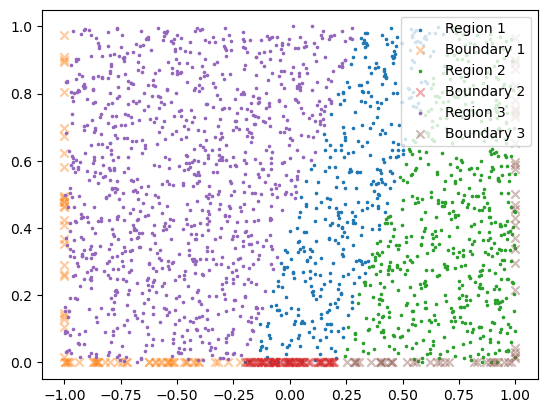

In [2]:
total_region.plot_points()

In [ ]:
from region import Region
import matplotlib.pyplot as plt

test = Region("advection_constraints.txt")

In [ ]:
bounds = test.test_boundary_points()

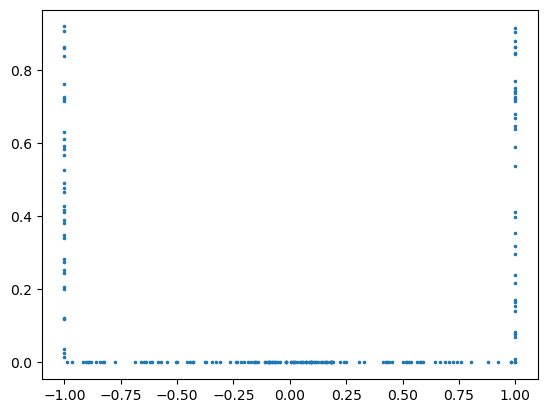

In [ ]:
plt.scatter(bounds[:, 0], bounds[:, 1], s=2.5)